In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/train.csv")

# Análise de Dados

<img src="https://cdna.artstation.com/p/assets/images/images/012/065/302/large/nathaniel-himawan-splash-progress-finale-font-post.jpg?1532869065" width=600 height=400></img>

Neste notebook iremos fazer uma análise de dados sobre o jogo **Gods Unchained**, tendo como principal objetivo conhecer os dados para que seja possível entender o que faz um card ser considerado de **early** ou **late** game.

Para isso precisamos entender o que é ser um card de early ou late game.
* early: São cards que são mais forte nos primeiros turnos do jogo.
* late: São cards que são mais fortes no turnos finais do jogo.

## Tabela de Conteúdo

1. [DataFrame](#dataframe)
    * [Número de Linhas e Colunas](#dataframe_num_lc)
    * [Tipo dos Dados](#dataframe_dtypes)
    * [Valores Nulos](#dataframe_null)
2. [Váriaveis Númericas](#num_vars)
    * [Mana](#mana)
    * [Attack](#attack)
    * [Health](#health)
3. [Váriaveis Categóricas](#cat_vars)
    * [Type](#type)
    * [God](#god)
4. [Váriavel Target](#target_var)
5. [Conclusão](#conclusion)

## DataFrame <a name="dataframe"></a>

Iremos começar fazendo uma exploração de validação dos dados.

In [3]:
df.head()

,id,name,mana,attack,health,type,god,strategy
0,1118,Firewine,5,0,0,spell,nature,early
1,1036,Leyhoard Hatchling,10,2,1,creature,magic,late
2,244,Aetherfuel Alchemist,6,4,4,creature,neutral,late
3,215,Millenium Matryoshka,4,2,2,creature,neutral,late
4,87013,Poison Peddler,4,1,3,creature,neutral,late


### Número de Linhas e Colunas <a name="dataframe_num_lc"></a>

In [4]:
df.shape

(788, 8)

### Tipo dos Dados <a name="dataframe_dtypes"></a>

In [5]:
df.dtypes

id           int64
name        object
mana         int64
attack       int64
health       int64
type        object
god         object
strategy    object
dtype: object

### Valores Nulos <a name="dataframe_null"></a>

In [6]:
df.isna().sum()

id          0
name        0
mana        0
attack      0
health      0
type        0
god         0
strategy    0
dtype: int64

## Váriaveis Númericas <a name="num_vars"></a>

Faremos agora a exploração das váriaveis númericas para conhecer melhor os dados.

## Mana <a name="mana"></a>

A váriavel mana indica o custo necessário para colocar um card no jogo. 

Exemplos de ganho de mana:
* Passagem de turno
* Ativação de Card

<Figure size 720x432 with 0 Axes>

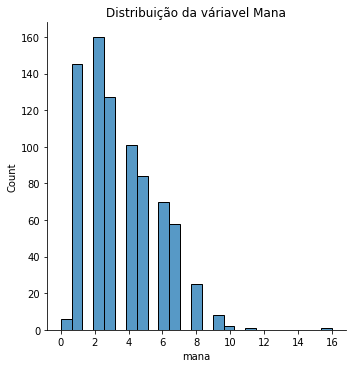

In [7]:
plt.figure(figsize=(10,6))
sns.displot(df, x="mana")
plt.title("Distribuição da váriavel Mana")
plt.show()

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


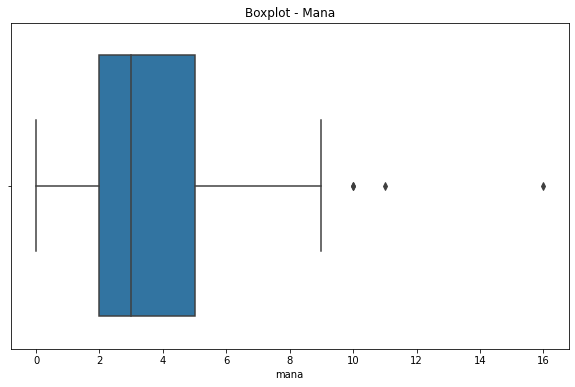

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(df['mana'])
plt.title("Boxplot - Mana")
plt.show()

Podemos ver que a maior parte dos cards custam aproximadamente 0 a 6 de mana, com a presença de alguns outliers que possuem o custo maior que 10. 

In [9]:
df[df["mana"] > 10]

,id,name,mana,attack,health,type,god,strategy
658,225,Deathwish Thanetar,16,4,4,creature,neutral,late
767,183,Leyline Djinn,11,4,4,creature,neutral,late


### Mana vs Strategy

<Figure size 720x432 with 0 Axes>

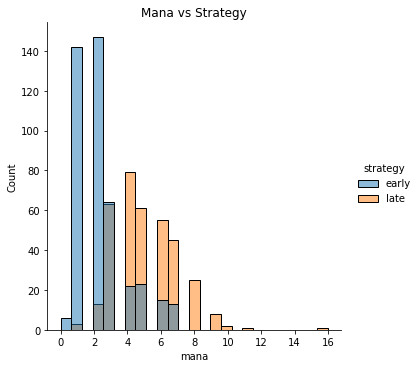

In [10]:
plt.figure(figsize=(10,6))
sns.displot(df, x="mana", hue="strategy")
plt.title("Mana vs Strategy")
plt.show()

In [11]:
df.groupby(["strategy"])\
  .agg({"mana": ["mean", "median", "min", "max"]})

mana               
              mean median min max
strategy                         
early     2.342593    2.0   0   7
late      5.064607    5.0   1  16

Podemos perceber que quanto menor o custo de mana mais chances de ser early e quanto maior o custo de mana mais chances de ser late.

## Attack <a name="attack"></a>

A váriavel indica a força de ataque do card.

<Figure size 720x432 with 0 Axes>

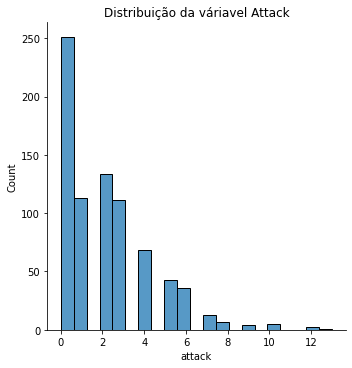

In [12]:
plt.figure(figsize=(10,6))
sns.displot(df, x="attack")
plt.title("Distribuição da váriavel Attack")
plt.show()

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


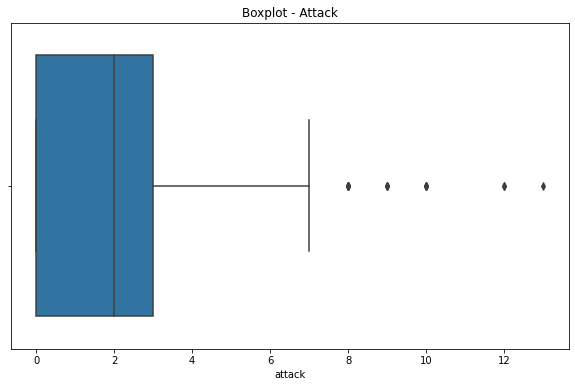

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(df['attack'])
plt.title("Boxplot - Attack")
plt.show()

Podemos verificar que a maior parte dos cards tem entre 0 a 6 de ataque, com a presença de alguns outliers.

In [14]:
df_attack_0 = df[df["attack"] == 0]
df_attack_0.groupby("type")\
           .agg({"type": "count"})

,type
type,
creature,20
god power,24
spell,191
weapon,16


In [15]:
df.groupby("type")\
  .agg({"type": "count"})

,type
type,
creature,526
god power,24
spell,191
weapon,47


Spells e God Powers possuem 0 de ataque.

### Attack vs Strategy

<Figure size 720x432 with 0 Axes>

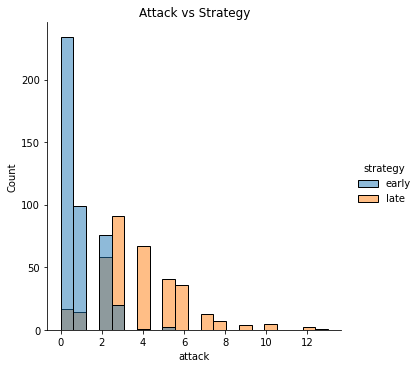

In [16]:
plt.figure(figsize=(10,6))
sns.displot(df, x="attack", hue="strategy")
plt.title("Attack vs Strategy")
plt.show()

In [17]:
df.groupby(["strategy"])\
  .agg({"attack": ["mean", "median", "min", "max"]})

attack               
              mean median min max
strategy                         
early     0.752315    0.0   0   5
late      3.825843    3.0   0  13

Podemos perceber que quanto menor o ataque mais chances de ser early e quanto maior o ataque mais chances de ser late.

## Health <a name="health"></a>

A váriavel indica os ponto de vida da carta.

<Figure size 720x432 with 0 Axes>

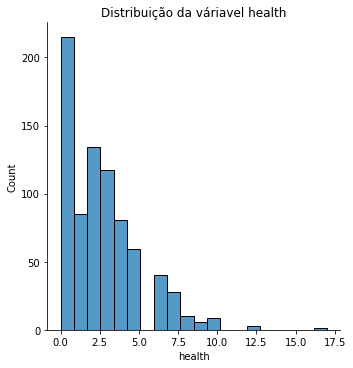

In [18]:
plt.figure(figsize=(10,6))
sns.displot(df, x="health")
plt.title("Distribuição da váriavel health")
plt.show()

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


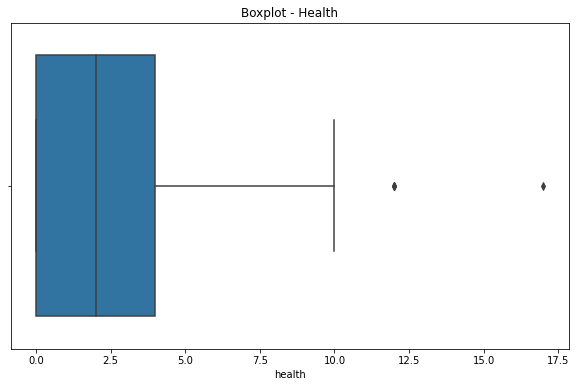

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(df['health'])
plt.title("Boxplot - Health")
plt.show()

Podemos verificar que a maior parte dos cards 0 a 5 pontos de vida, com a presença de 2 outliers.

In [20]:
df_health_0 = df[df["health"] == 0]
df_health_0.groupby("type")\
           .agg({"type": "count"})

,type
type,
god power,24
spell,191


In [21]:
df[df["type"].isin(["god power", "spell"])]\
             .groupby("type")\
             .agg({"type": "count"})

,type
type,
god power,24
spell,191


Os cards que possuem 0 de vida são os god powers e spells.

In [22]:
df[df["health"] > 10]

,id,name,mana,attack,health,type,god,strategy
65,259,Warden of Kauket,8,3,12,creature,neutral,late
76,906,Guardian of the Underworld,8,13,17,creature,death,late
671,1108,"Ladon, Uclid Dragon",8,12,12,creature,neutral,late
727,1086,Helian Elite,8,10,12,creature,neutral,late


### Health vs Strategy

<Figure size 720x432 with 0 Axes>

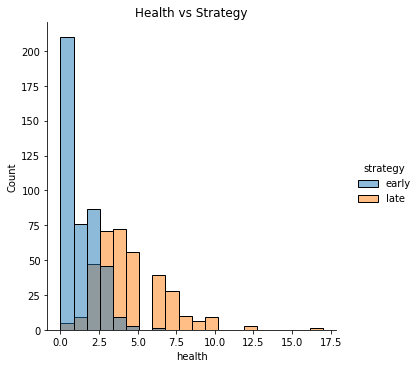

In [23]:
plt.figure(figsize=(10,6))
sns.displot(df, x="health", hue="strategy")
plt.title("Health vs Strategy")
plt.show()

In [24]:
df.groupby(["strategy"])\
  .agg({"health": ["mean", "median", "min", "max"]})

health               
              mean median min max
strategy                         
early     1.030093    1.0   0   6
late      4.469101    4.0   0  17

Podemos perceber que quanto menor a vida mais chances de ser early e quanto maior a vida mais chances de ser late.

## Váriaveis Categóricas <a name="cat_vars"></a>

Agora a exploração das váriaveis Categóricas.

## Type <a name="type"></a>

A váriavel indica o tipo do card.

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


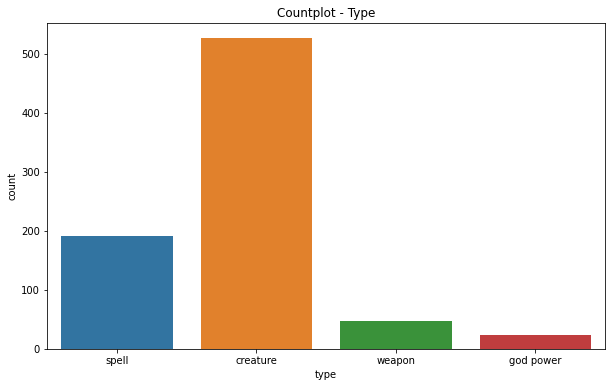

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df['type'])
plt.title("Countplot - Type")
plt.show()

Podemos perceber que a maior parte dos cards são respectivamente creatures e spells.

### Type vs Strategy

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


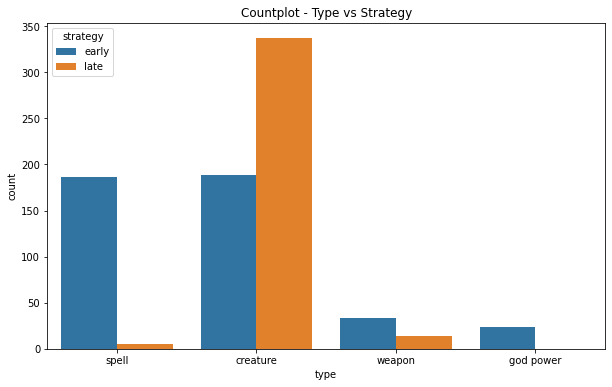

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['type'], hue=df["strategy"])
plt.title("Countplot - Type vs Strategy")
plt.show()

In [27]:
df.groupby(["type", "strategy"])\
  .agg({"type": "count"})

type
type      strategy      
creature  early      189
          late       337
god power early       24
spell     early      186
          late         5
weapon    early       33
          late        14

É interessante ver que a maior parte dos cards que são god powers, spells e weapons são de early.

## God <a name="god"></a>

A váriavel indica o elemento/heroi do card.

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


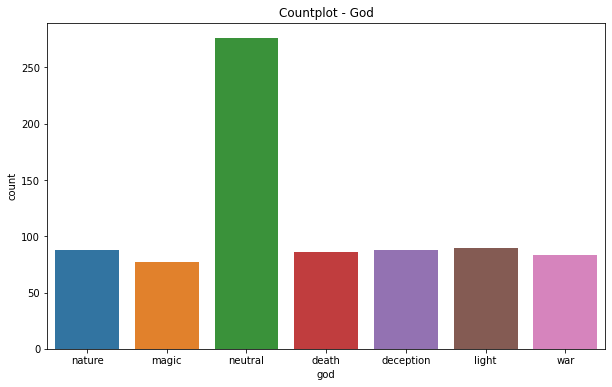

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df['god'])
plt.title("Countplot - God")
plt.show()

Podemos perceber que é bem dividido o número de cards para cada God.

### God vs Strategy

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


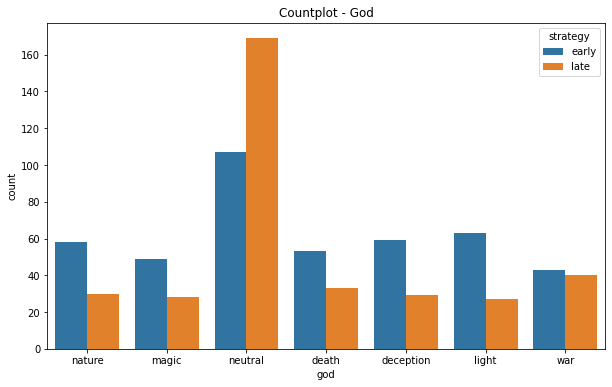

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['god'], hue=df["strategy"])
plt.title("Countplot - God")
plt.show()

## Variável Target <a name="target_var"></a>

/opt/anaconda3/envs/guca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


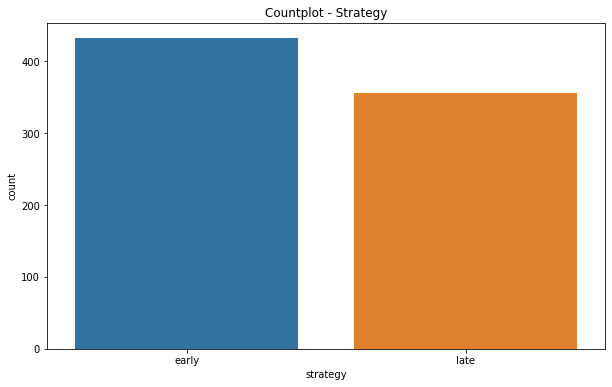

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df['strategy'])
plt.title("Countplot - Strategy")
plt.show()

É possível perceber que as classes do dataset de treinamento estão bem balanceadas.

## Conclusão <a name="conclusion"></a>

A partir dessa análise podemos chegar as seguintes conclusões. 

* Podemos afirmar que de fato mana, attack e health influenciam muito na strategia do card.
* As cartas de spell e god power são quase em sua maioria de early game.
* O tipo de God não influencia tanto na strategia do card.
* os cards spells e god powers não possuem attack e health.